In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from MNISTConvNet import MNISTConvNet
from nas_wot import score
from model_utils import train

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

In [2]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    
    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        # t = F.softmax(t, dim=1)

        return t

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

In [16]:
print(len(train_set))
print(train_set[0][0].size())

60000
torch.Size([1, 28, 28])


<class 'torch.Tensor'>


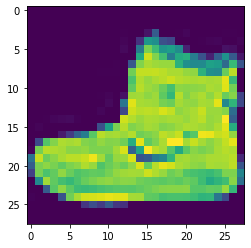

In [21]:
import matplotlib.pyplot as plt

torch_image = train_set[0][0]
print(type(torch_image))
npimage = torch_image.permute(1,2,0)
plt.imshow(npimage)

In [23]:
images, labels = next(iter(train_loader))
print(type(images))
print(images.shape)
print(type(labels))
# print(labels.shape)

<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([100])


In [18]:
network = Network()
#train(network, 2, train_loader)

In [19]:
score(network, train_loader, 10)

-131.31969124219523

In [20]:
for i in range(5):
    print(score(network, train_loader, 100))

-130.3130383888974
-129.53631001945317
-131.24374925984569
-130.52394637074872
-130.0957469662648


In [21]:
for i in range(5):
    print(score(network, train_loader, 600))

-129.84451784590078
-129.87690978003914
-130.34889298560034
-130.28927984629806
-130.1085017460331
